In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.shape

(1599, 12)

In [4]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [21]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


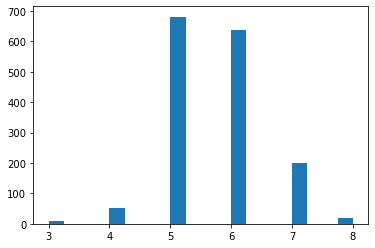

In [7]:
target_column = data["quality"]
plt.hist(target_column, bins=20)
plt.show()

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Function for data preprocessing
def preprocess_data(data, target_column):
    # Separating features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    print(X)
    print(y)
    
    # Handling missing values
    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    
    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)
    
    return X_train_preprocessed, X_test_preprocessed, y_train, y_test

In [12]:
preprocess_data(data, target_column="quality")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

(array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
        [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
        [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
        ...,
        [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
        [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
        [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]]),
 array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
        [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
        [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
        ...,
        [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
        [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
        [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]]),
 493     6
 354     6
 342     6
 834     5
 705     5
        ..
 1130    6
 1294    6
 860     5
 1459    7
 1126    6
 Name: quality, Length: 1279, dtype: int64,
 803     6
 124     5
 350     6
 682     5
 1326    6
        ..
 1259    6
 1295   

In [13]:
def build_decision_tree(X_train, y_train, max_depth=None):
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    return classifier

In [15]:
X_train, x_test, y_train, y_test = preprocess_data(data,target_column="quality")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [16]:
# Function for evaluating the model
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)


    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
    disp.plot()
    plt.plot()
    return accuracy, report, confusion_mat

In [17]:
classifier = build_decision_tree(X_train,y_train)

(1.0,
 '              precision    recall  f1-score   support\n\n           3       1.00      1.00      1.00         9\n           4       1.00      1.00      1.00        43\n           5       1.00      1.00      1.00       551\n           6       1.00      1.00      1.00       506\n           7       1.00      1.00      1.00       157\n           8       1.00      1.00      1.00        13\n\n    accuracy                           1.00      1279\n   macro avg       1.00      1.00      1.00      1279\nweighted avg       1.00      1.00      1.00      1279\n',
 array([[  9,   0,   0,   0,   0,   0],
        [  0,  43,   0,   0,   0,   0],
        [  0,   0, 551,   0,   0,   0],
        [  0,   0,   0, 506,   0,   0],
        [  0,   0,   0,   0, 157,   0],
        [  0,   0,   0,   0,   0,  13]], dtype=int64))

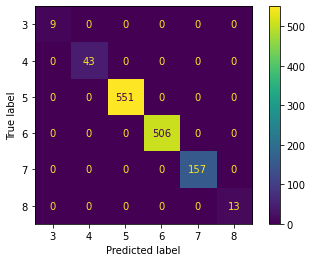

In [18]:
evaluate_model(classifier, X_train, y_train)

In [22]:
from sklearn.metrics import accuracy_score


In [24]:
classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.58125


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
rf_classifier = RandomForestClassifier(random_state=42)

In [30]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [32]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
best_rf_classifier = grid_search.best_estimator_

In [34]:
y_pred = best_rf_classifier.predict(x_test)

In [35]:
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning:", accuracy1)

Accuracy after hyperparameter tuning: 0.659375
